In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Upload and read the data
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("covid_big_data.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Preview
print(df.head())


Saving covid_big_data.csv to covid_big_data.csv
        Date Country  Confirmed  Deaths  Recovered
0 2020-01-22   India        220       2         88
1 2020-01-23   India        694       6        205
2 2020-01-24   India        943      14        401
3 2020-01-25   India       1105      21        503
4 2020-01-26   India       1530      27        701


In [6]:
print(df.describe())
totals = df.groupby('Country')[['Confirmed', 'Deaths', 'Recovered']].max()
print(totals)


                      Date     Confirmed      Deaths     Recovered  \
count                  300    300.000000  300.000000    300.000000   
mean   2020-03-11 12:00:00  14730.156667  246.000000   6288.600000   
min    2020-01-22 00:00:00    220.000000    1.000000     88.000000   
25%    2020-02-15 18:00:00   7167.250000  119.750000   3259.500000   
50%    2020-03-11 12:00:00  14837.000000  246.500000   6197.500000   
75%    2020-04-05 06:00:00  21753.250000  367.250000   9292.250000   
max    2020-04-30 00:00:00  30073.000000  498.000000  13052.000000   
std                    NaN   8407.790634  142.574255   3599.188579   

        New_Cases  Death_Rate  Recovery_Rate  
count  300.000000  300.000000     300.000000  
mean   290.970000    0.016620       0.427279  
min      0.000000    0.002427       0.295389  
25%    188.750000    0.015885       0.394384  
50%    291.500000    0.016427       0.429766  
75%    390.750000    0.018014       0.450967  
max    498.000000    0.022453       0.58

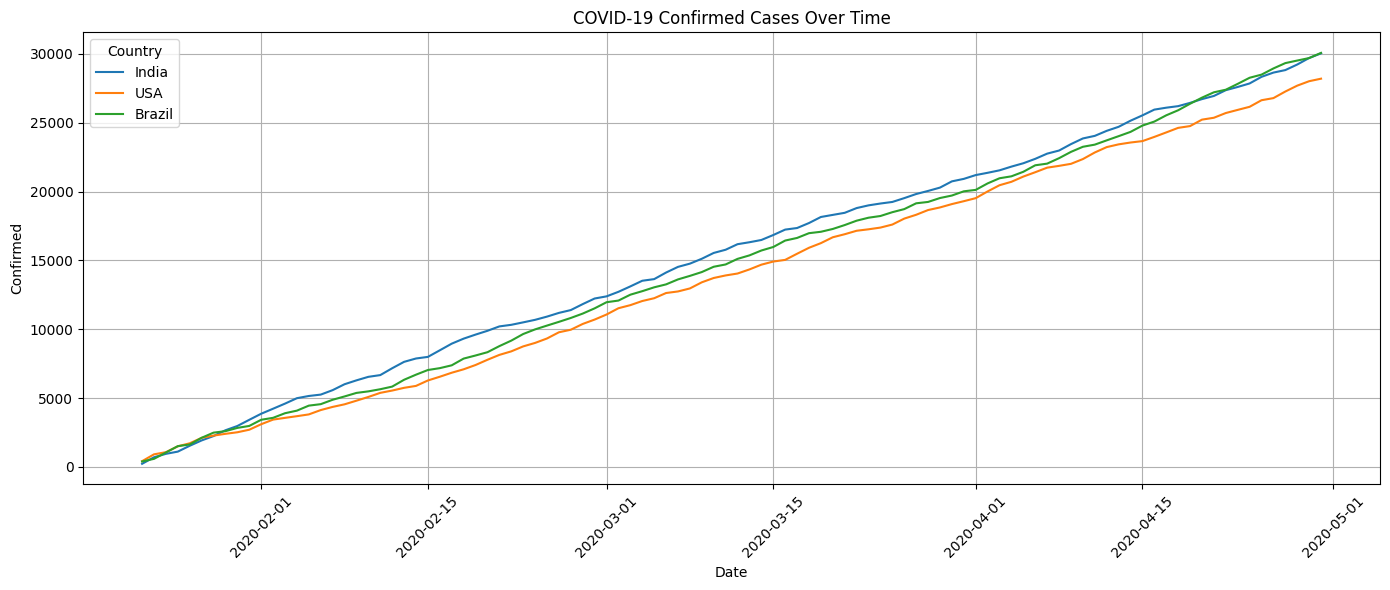

In [3]:
import seaborn as sns

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='Date', y='Confirmed', hue='Country')
plt.title('COVID-19 Confirmed Cases Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


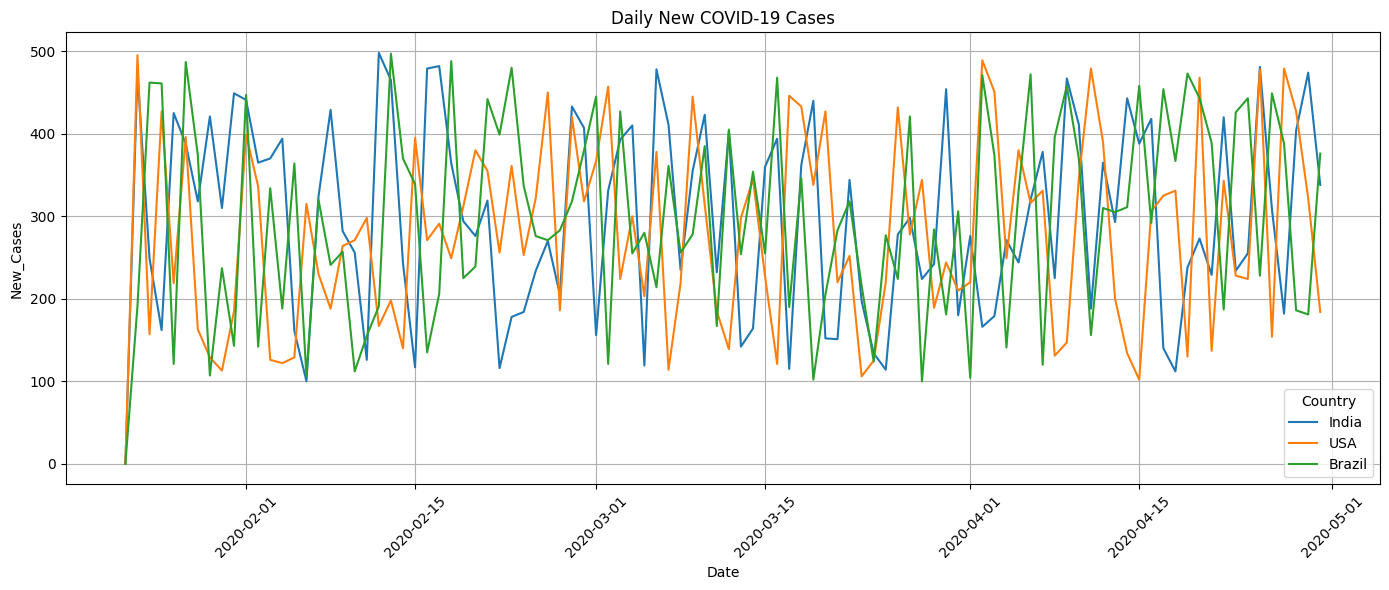

In [4]:
df['New_Cases'] = df.groupby('Country')['Confirmed'].diff().fillna(0)

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='Date', y='New_Cases', hue='Country')
plt.title('Daily New COVID-19 Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


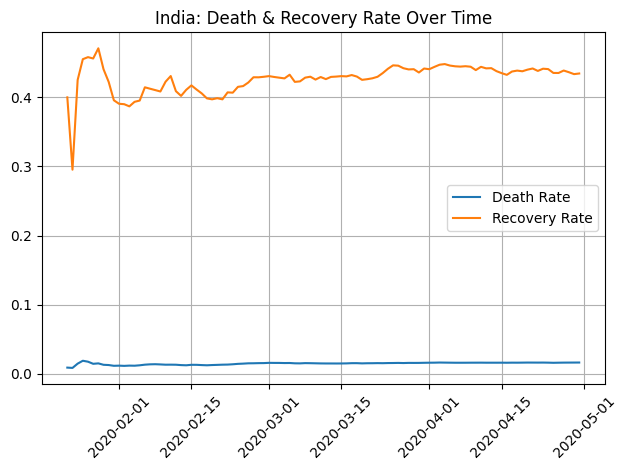

In [5]:
df['Death_Rate'] = df['Deaths'] / df['Confirmed']
df['Recovery_Rate'] = df['Recovered'] / df['Confirmed']

# Plot for one country example
india = df[df['Country'] == 'India']
plt.plot(india['Date'], india['Death_Rate'], label='Death Rate')
plt.plot(india['Date'], india['Recovery_Rate'], label='Recovery Rate')
plt.legend()
plt.title('India: Death & Recovery Rate Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


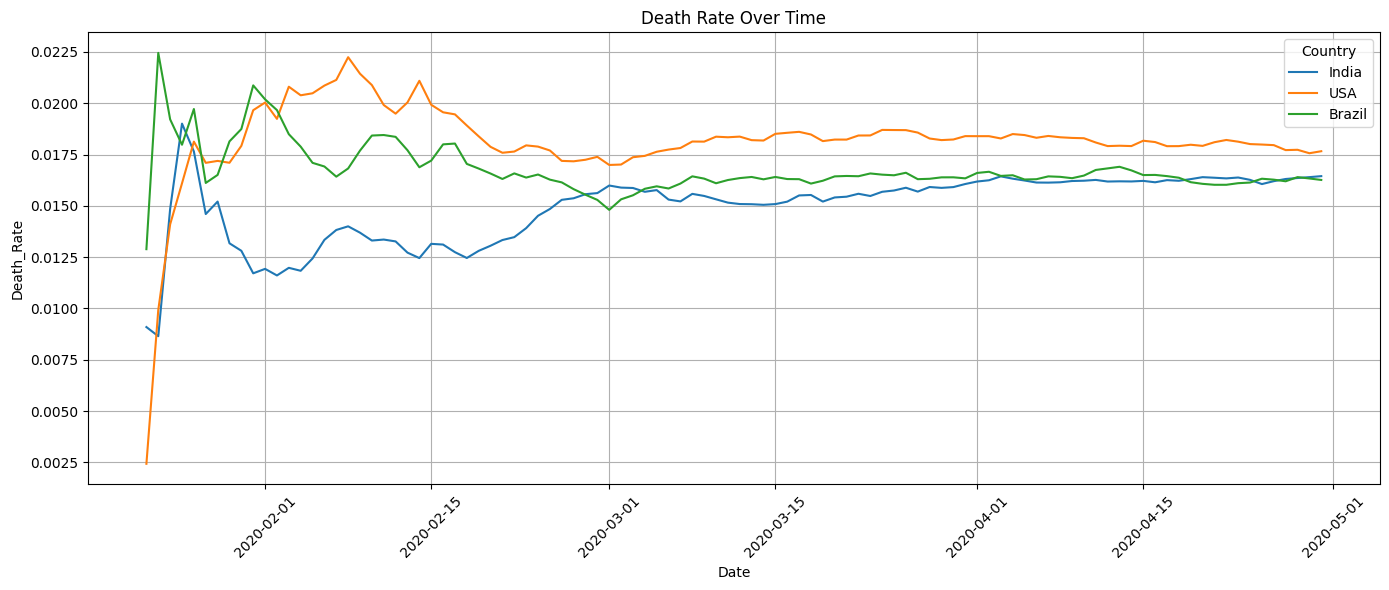

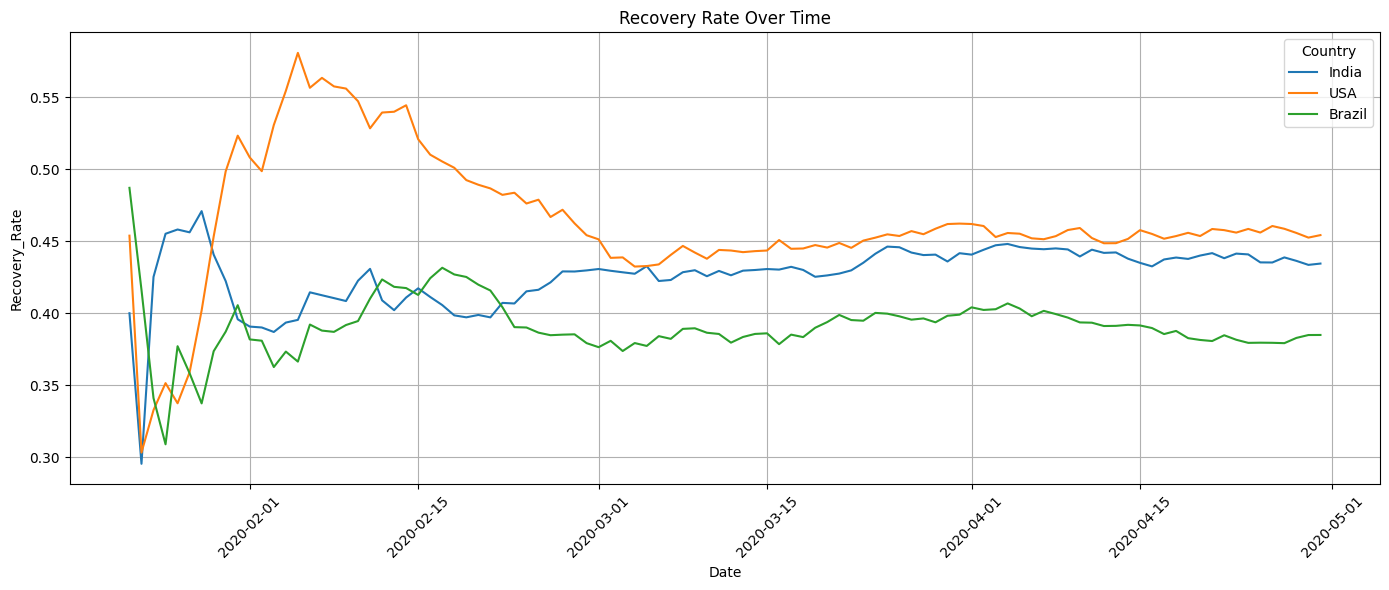

In [8]:
df['Death_Rate'] = df['Deaths'] / df['Confirmed']
df['Recovery_Rate'] = df['Recovered'] / df['Confirmed']

# Plot for all countries
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Death_Rate', hue='Country')
plt.title('Death Rate Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Recovery_Rate', hue='Country')
plt.title('Recovery Rate Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
